In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from ultralytics import YOLO
import torch
import numpy as np

In [2]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Detection

In [3]:
#Loading the model
model=YOLO('yolo11n.pt')

In [17]:
#Prediction
img=Image.open('img1.jpeg')
res_dect=model(img)


0: 384x640 6 persons, 1 car, 3 buss, 1 truck, 1 traffic light, 3.9ms
Speed: 11.7ms preprocess, 3.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


In [5]:
#Show the result
for res in res_dect:
    res.show()

In [6]:
#Category
categories=res_dect[0].names
categories

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [18]:
res_dect[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 0., 0., 2., 0., 0., 0., 5., 7., 5., 9., 0.], device='cuda:0')
conf: tensor([0.9080, 0.7642, 0.7389, 0.6939, 0.6625, 0.5159, 0.5133, 0.4671, 0.4487, 0.4108, 0.3288, 0.2508], device='cuda:0')
data: tensor([[5.5734e+01, 2.4620e+01, 1.4224e+02, 1.2344e+02, 9.0801e-01, 5.0000e+00],
        [3.8197e+01, 8.0163e+01, 5.2070e+01, 1.3036e+02, 7.6422e-01, 0.0000e+00],
        [5.0286e+01, 7.9906e+01, 6.8698e+01, 1.3879e+02, 7.3888e-01, 0.0000e+00],
        [1.7593e+02, 6.1109e+01, 2.8970e+02, 1.4378e+02, 6.9386e-01, 2.0000e+00],
        [1.1617e+02, 8.8927e+01, 1.3371e+02, 1.3093e+02, 6.6252e-01, 0.0000e+00],
        [1.7963e+01, 8.4730e+01, 3.0473e+01, 1.1939e+02, 5.1586e-01, 0.0000e+00],
        [7.1174e+00, 8.5111e+01, 1.7199e+01, 1.1048e+02, 5.1327e-01, 0.0000e+00],
        [1.4015e+02, 5.7641e+01, 1.9006e+02, 1.2452e+02, 4.6712e-01, 5.0000e+00],
        [1.7552e+02, 6.0936e+01, 2.8934e+02, 1.4378e+02, 4.4874e-01, 7.00

Visualization

In [8]:
from PIL import ImageColor

In [25]:
#Draw the box of detection and the mask
def yolo_visual(results,img=None, masks=None):
    if img==None:
        img=Image.fromarray(results[0].orig_img)
    draw=ImageDraw.Draw(img)
    boxes=results[0].boxes
    classes=boxes.cls.tolist()
    scores=boxes.conf
    coords=boxes.xyxy
    if masks==None:
        for cls, score, coor in zip(classes, scores, coords):
            x,y,x2,y2=tuple(coor)
            draw.text((x,y), f'{categories[int(cls)]}:{format(score, '.2f')}', fill='red')
            draw.rectangle((x, y, x2, y2), outline='white')
    if masks:
        #colors=[np.random.choice(range(200,256), 3) for _ in classes]
        for mask, cls in zip(masks.xy, classes):
            draw.polygon(mask, fill=None, outline='blue') #tuple(colors[int(classes.index(cls))])
    return img

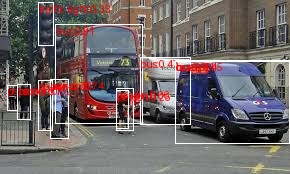

In [26]:
img=Image.open('img1.jpeg')
dect_img=yolo_visual(res_dect, img)
dect_img

Inference arguments

In [13]:
classes=[0,1,2,5,7,9] #list of ID of class detected
conf=0.4 # Confidence threshold

In [14]:
dect_img_args=model(img, conf=conf, classes=classes)


0: 384x640 1 car, 2 buss, 1 traffic light, 13.1ms
Speed: 15.6ms preprocess, 13.1ms inference, 12.6ms postprocess per image at shape (1, 3, 384, 640)


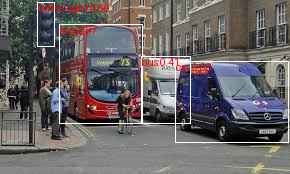

In [ ]:
img=Image.open('img1.jpeg')
res_dect_args=yolo_visual(dect_img_args, img)
res_dect_args

Detection with a ViT model

In [36]:
from transformers import pipeline

In [17]:
#Loading model from HuggingFace and using the pipeline
model_id='facebook/detr-resnet-50'
pipe=pipeline(task='object-detection', model=model_id, device=device) #Threshold defaut =0.5

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
#Detection image, the confidence default is 0.5
img=Image.open('img1.jpeg')
img_pipe1=pipe(img)
img_pipe1

[{'score': 0.6154980659484863,
  'label': 'person',
  'box': {'xmin': 11, 'ymin': 87, 'xmax': 19, 'ymax': 109}},
 {'score': 0.6443333029747009,
  'label': 'person',
  'box': {'xmin': 109, 'ymin': 82, 'xmax': 118, 'ymax': 92}},
 {'score': 0.9899519085884094,
  'label': 'person',
  'box': {'xmin': 116, 'ymin': 89, 'xmax': 133, 'ymax': 132}},
 {'score': 0.9704650640487671,
  'label': 'traffic light',
  'box': {'xmin': 37, 'ymin': 3, 'xmax': 58, 'ymax': 52}},
 {'score': 0.974545955657959,
  'label': 'person',
  'box': {'xmin': 17, 'ymin': 85, 'xmax': 28, 'ymax': 120}},
 {'score': 0.9411849975585938,
  'label': 'truck',
  'box': {'xmin': 176, 'ymin': 62, 'xmax': 290, 'ymax': 144}},
 {'score': 0.5759702324867249,
  'label': 'traffic light',
  'box': {'xmin': 36, 'ymin': 4, 'xmax': 59, 'ymax': 70}},
 {'score': 0.9647859930992126,
  'label': 'truck',
  'box': {'xmin': 140, 'ymin': 57, 'xmax': 191, 'ymax': 122}},
 {'score': 0.7684585452079773,
  'label': 'car',
  'box': {'xmin': 140, 'ymin': 90

In [19]:
def vit_visual(results,img):
    draw=ImageDraw.Draw(img)
    for pred in results:
        score=pred['score']
        label=pred['label']
        x,y,x2,y2=pred['box'].values()
        draw.rectangle((x,y,x2,y2), outline='red', width=1)
        draw.text((x,y), f'{label}: {round(score,2)}', fill='white')
    return img

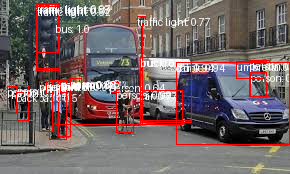

In [20]:
img=Image.open('img1.jpeg')
dect_vit=vit_visual(img_pipe1, img)
dect_vit


Threshold

In [21]:
#Take the confidence=0.7
img=Image.open('img1.jpeg')
img_pipe2=pipe(img, threshold=0.7)

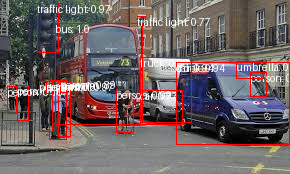

In [22]:
dect_vit_args=vit_visual(img_pipe2, img)
dect_vit_args

### Segmentation

In [ ]:
#Loading model
seg_model=YOLO('yolo11n-seg.pt')
img=Image.open('img1.jpeg')
res_seg=seg_model(img)


0: 384x640 5 persons, 1 car, 3 buss, 1 truck, 1 traffic light, 11.8ms
Speed: 1.1ms preprocess, 11.8ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


In [28]:
boxes=res_seg[0].boxes
masks=res_seg[0].masks

In [29]:
#Show the prediction
for mask in res_seg:
    mask.show()

Visualization

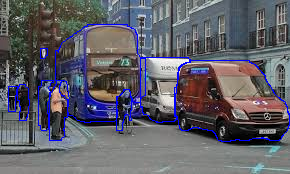

In [32]:
res_seg=yolo_visual(res_seg, masks=masks)
res_seg

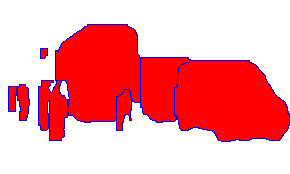

In [33]:
back_ground=Image.new(mode='RGB', size=masks.orig_shape[::-1], color=(255,255,255))
for mask in masks.xy:
    draw=ImageDraw.Draw(back_ground)
    draw.polygon(mask, fill=255, outline='blue')
back_ground

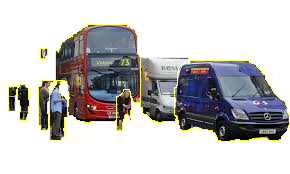

In [34]:
img_org=np.array(Image.open('img1.jpeg'))
back_ground2=Image.new(mode='RGB', size=masks.orig_shape[::-1], color=(0,0,0))
mask_img=np.ones_like(img_org)*255
draw=ImageDraw.Draw(back_ground2)
for mask in masks.xy:    
    draw.polygon(mask, fill=(255,255,255), outline='blue')
mask_img[np.array(back_ground2)==(255,255,255)]=img_org[np.array(back_ground2)==(255,255,255)]
Image.fromarray(mask_img)

Detection by ViT

In [37]:
#Loading model from HuggingFace
model_id='nvidia/segformer-b1-finetuned-cityscapes-1024-1024'
pipe=pipeline(task='image-segmentation', model=model_id, device=device)

In [40]:
res_seg_vit=pipe(img)
res_seg_vit

[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=290x174>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=290x174>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=290x174>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=290x174>},
 {'score': None,
  'label': 'fence',
  'mask': <PIL.Image.Image image mode=L size=290x174>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=290x174>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=290x174>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=290x174>},
 {'score': None,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=290x174>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=290x174>},
 {'score': None,
  'label': 'truck',
  'mask': <PIL.Imag

In [41]:
len(res_seg_vit)

11

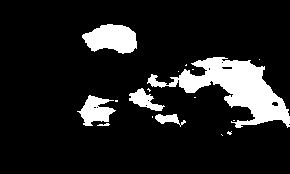

In [43]:
res_seg_vit[-2]['mask']